<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/11_3_%EC%9D%B4%EB%AF%B8%EC%A7%80_%ED%8C%8C%EC%9D%BC_%EC%9D%BD%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

꽃에 대한 이미지 파일입니다 .

https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

In [ ]:
import tensorflow as tf
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)

In [ ]:
data_dir

'/root/.keras/datasets/flower_photos'

In [ ]:
!ls /root/.keras/datasets/flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [ ]:
!ls /root/.keras/datasets/flower_photos/roses

10090824183_d02c613f10_m.jpg  3494252600_29f26e3ff0_n.jpg
102501987_3cdb8e5394_n.jpg    3500121696_5b6a69effb_n.jpg
10503217854_e66a804309.jpg    3526860692_4c551191b1_m.jpg
10894627425_ec76bbc757_n.jpg  353897245_5453f35a8e.jpg
110472418_87b6a3aa98_m.jpg    3550491463_3eb092054c_m.jpg
11102341464_508d558dfc_n.jpg  3554620445_082dd0bec4_n.jpg
11233672494_d8bf0a3dbf_n.jpg  3556123230_936bf084a5_n.jpg
11694025703_9a906fedc1_n.jpg  3560426426_1c66cb8330.jpg
118974357_0faa23cce9_n.jpg    3576488381_611f3446e0_n.jpg
11944957684_2cc806276e.jpg    3621011057_0d03bd171b_n.jpg
12045735155_42547ce4e9_n.jpg  3624546109_8eb98f0cdb.jpg
12165480946_c4a3fe182d_n.jpg  3630246240_4fee9a33db.jpg
12202373204_34fb07205b.jpg    3634244527_e72c47842c_n.jpg
12238827553_cf427bfd51_n.jpg  3654988152_b11178bbcb.jpg
12240165555_98625b1e88_n.jpg  3655527028_0fab2b547d_n.jpg
12240303_80d87f77a3_n.jpg     3661675690_ed2d05fa5f_n.jpg
12240577184_b0de0e53ea_n.jpg  3663244576_97f595cf4a.jpg
12243068283_ee4c2683e2_n.jp

In [ ]:
import glob
roses = list(glob.glob(data_dir+'/roses/*.*')) #폴더 내의 파일(경로포함) 가져오기

In [ ]:
roses

['/root/.keras/datasets/flower_photos/roses/537625768_791e973b40.jpg',
 '/root/.keras/datasets/flower_photos/roses/1666341535_99c6f7509f_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/7147367479_f7a6ef0798.jpg',
 '/root/.keras/datasets/flower_photos/roses/3829990289_c0c3821e4d_m.jpg',
 '/root/.keras/datasets/flower_photos/roses/6111589202_8b9555364c_m.jpg',
 '/root/.keras/datasets/flower_photos/roses/12338444334_72fcc2fc58_m.jpg',
 '/root/.keras/datasets/flower_photos/roses/3465443774_6b0c75a3b1_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/9167147034_0a66ee3616_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/873660804_37f5c6a46e_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/16476788181_0e2ffc719a.jpg',
 '/root/.keras/datasets/flower_photos/roses/4503599544_3822e7d1be.jpg',
 '/root/.keras/datasets/flower_photos/roses/14166797345_d2ab9da518.jpg',
 '/root/.keras/datasets/flower_photos/roses/8437935944_aab997560a_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/286

In [ ]:
import cv2
img = cv2.imread(roses[1]) 

In [ ]:
img

array([[[ 92, 114, 179],
        [ 93, 115, 181],
        [ 95, 117, 183],
        ...,
        [101, 118, 175],
        [100, 119, 176],
        [ 99, 119, 176]],

       [[ 92, 114, 179],
        [ 93, 115, 181],
        [ 96, 118, 184],
        ...,
        [100, 117, 174],
        [ 98, 117, 174],
        [ 97, 117, 174]],

       [[ 92, 114, 179],
        [ 94, 116, 182],
        [ 96, 118, 184],
        ...,
        [101, 118, 175],
        [ 98, 117, 174],
        [ 97, 116, 173]],

       ...,

       [[125, 130, 185],
        [116, 126, 180],
        [116, 128, 182],
        ...,
        [118, 132, 180],
        [118, 132, 180],
        [118, 132, 180]],

       [[125, 130, 185],
        [118, 125, 182],
        [118, 127, 184],
        ...,
        [121, 133, 181],
        [120, 132, 180],
        [120, 132, 180]],

       [[127, 129, 187],
        [119, 126, 183],
        [117, 125, 184],
        ...,
        [121, 133, 181],
        [120, 132, 180],
        [119, 131, 179]]

In [ ]:
img.shape

(287, 320, 3)

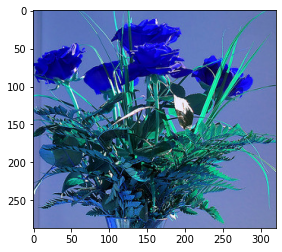

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
img_height = 180
img_width = 180

옵션 참고

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width))

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width))

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [ ]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
cnt = 0
for image_batch, labels_batch in train_ds:
  cnt +=1
  print(cnt)
  print(image_batch.shape)  
  print(labels_batch.shape)
  if cnt>= 3:break

1
(32, 180, 180, 3)
(32,)
2
(32, 180, 180, 3)
(32,)
3
(32, 180, 180, 3)
(32,)


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
cnt=0
for images, labels in train_ds.take(2):  #특정 데이터만 가져오기, batch_size가 기본 단위가 됨
    cnt +=1
    print(cnt)
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

1
2


In [ ]:
numpy_images.shape 

(32, 180, 180, 3)

In [ ]:
numpy_images[0,:,:,0]

array([[25.620987, 30.525925, 31.653702, ..., 24.171614, 20.80749 ,
        17.048405],
       [24.098148, 28.9     , 30.299997, ..., 22.472332, 25.488974,
        19.697977],
       [27.58642 , 27.37963 , 28.265432, ..., 17.793274, 22.240778,
        20.058554],
       ...,
       [ 7.194448,  9.240743, 11.833341, ...,  8.123458, 10.138947,
         5.848619],
       [ 9.611084, 12.183309, 10.811063, ..., 11.344453,  8.277829,
         9.910889],
       [11.046928, 14.427795, 12.716009, ..., 10.589418,  9.853859,
         8.741919]], dtype=float32)

In [ ]:
numpy_labels

array([1, 2, 1, 4, 1, 3, 2, 4, 4, 3, 3, 2, 2, 2, 4, 1, 3, 1, 4, 1, 4, 3,
       1, 3, 0, 3, 4, 2, 4, 0, 4, 3], dtype=int32)

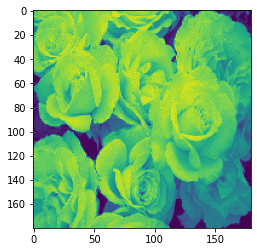

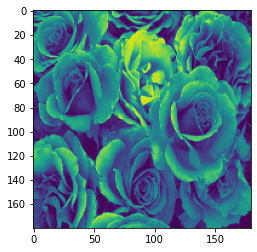

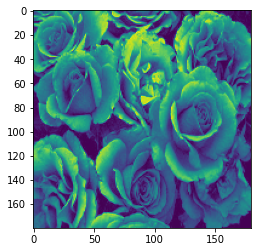

In [ ]:
plt.figure()
plt.imshow(numpy_images[1,:,:,0]) #
plt.show()

plt.figure()
plt.imshow(numpy_images[1,:,:,1])
plt.show()

plt.figure()
plt.imshow(numpy_images[1,:,:,2])
plt.show()

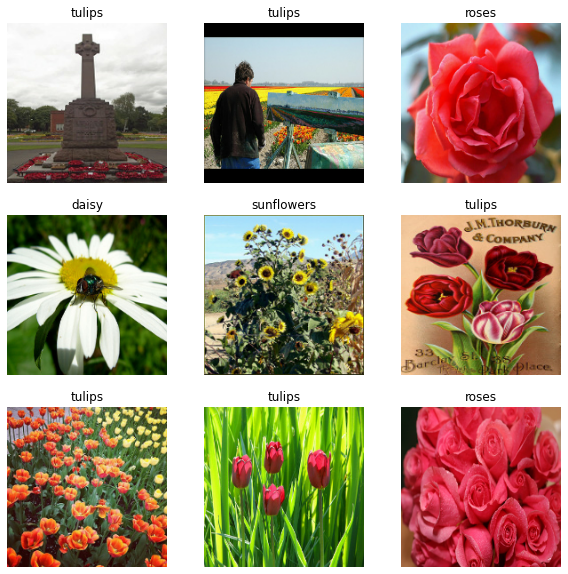

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('int'))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras import layers

In [ ]:
num_classes = 5

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
92/92 [==============================] - 9s 93ms/step - loss: 1.4923 - accuracy: 0.3565 - val_loss: 1.1854 - val_accuracy: 0.4877
Epoch 2/10
92/92 [==============================] - 9s 93ms/step - loss: 1.0349 - accuracy: 0.6039 - val_loss: 0.9523 - val_accuracy: 0.6199
Epoch 3/10
92/92 [==============================] - 9s 93ms/step - loss: 0.9029 - accuracy: 0.6423 - val_loss: 0.9294 - val_accuracy: 0.6362
Epoch 4/10
92/92 [==============================] - 9s 93ms/step - loss: 0.7332 - accuracy: 0.7255 - val_loss: 0.9052 - val_accuracy: 0.6499
Epoch 5/10
92/92 [==============================] - 9s 92ms/step - loss: 0.5397 - accuracy: 0.8092 - val_loss: 1.0259 - val_accuracy: 0.6403
Epoch 6/10
92/92 [==============================] - 9s 93ms/step - loss: 0.3861 - accuracy: 0.8719 - val_loss: 1.0841 - val_accuracy: 0.6649
Epoch 7/10
92/92 [==============================] - 9s 92ms/step - loss: 0.2258 - accuracy: 0.9262 - val_loss: 1.3079 - val_accuracy: 0.6349
Epoch 8/10
92

In [ ]:
model.predict(val_ds)

array([[-23.582623  ,  -3.551752  ,   7.7912254 , -28.647947  ,
         16.700987  ],
       [  3.1132925 ,  -1.0466902 ,  -2.0125315 ,   4.4909134 ,
         -2.438945  ],
       [ -7.4532795 ,   6.3486514 ,  -1.5722103 ,   2.1060326 ,
         -3.4973903 ],
       ...,
       [ -5.0976024 ,   6.7283473 ,  -7.087147  , -12.043869  ,
          7.4405656 ],
       [  0.79906166,  -4.853222  ,  -4.960299  ,  17.347668  ,
          1.3320616 ],
       [ -8.386138  ,  -7.696498  ,  14.58379   , -15.143617  ,
          9.92429   ]], dtype=float32)

Numpy로 가지고 있는 경우

In [ ]:
img = numpy_images[:10,:,:,:]
pred_y=model.predict(img)

In [ ]:
pred_y.shape

(10, 5)

In [ ]:
pred_y

array([[  0.6453802 ,   9.863165  ,  -3.1279302 , -10.606428  ,
         -4.999072  ],
       [ -6.46646   ,  -2.4012163 ,  12.473705  ,  -7.914774  ,
          2.873472  ],
       [  1.7542137 ,   7.877122  ,  -4.2227182 ,  -6.0369625 ,
         -4.230255  ],
       [ -7.773909  ,  -2.2792022 ,  -4.9498706 , -10.95183   ,
         15.168582  ],
       [  1.4347401 ,   3.2533362 ,  -1.3990347 ,  -3.1742842 ,
         -4.176674  ],
       [ -0.13899732,  -0.67413473,  -6.2820916 ,  10.958454  ,
         -2.5359194 ],
       [-16.150831  ,  -4.2696233 ,  16.773262  ,  -9.697899  ,
          7.313348  ],
       [ -0.96018255,  -7.5189466 ,   1.1266418 ,  -4.399518  ,
          9.503973  ],
       [ -6.89066   , -11.863376  ,   4.6931767 ,   1.0538216 ,
          8.385     ],
       [  3.7457528 ,   2.8737125 ,  -8.840481  ,  11.738707  ,
         -5.665498  ]], dtype=float32)

In [ ]:
pred_labels = pred_y.argmax(axis=1)

In [ ]:
pred_labels

array([1, 2, 1, 4, 1, 3, 2, 4, 4, 3])

In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


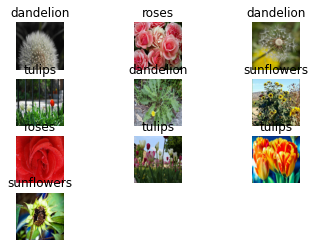

In [ ]:
for i in range(10):
  ax = plt.subplot(4, 3, i + 1)
  plt.imshow(numpy_images[i].astype("int"))
  plt.title(class_names[pred_labels[i]])
  plt.axis("off")